In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from src.medidas_desempeno_biclase import calcula_medidas_biclase

In [15]:
ruta = 'data/df_limpio.csv'
df = pd.read_csv(ruta)
df.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Area,Status
0,0.070489,0.000000,0.214286,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,0.054830,0.036192,0.182857,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.035250,0.000000,0.094286,0.74359,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,0.030093,0.056592,0.171429,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,0.072356,0.000000,0.201429,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


### Distribución de datos faltantes

Text(0.5, 1.0, 'Valores faltantes')

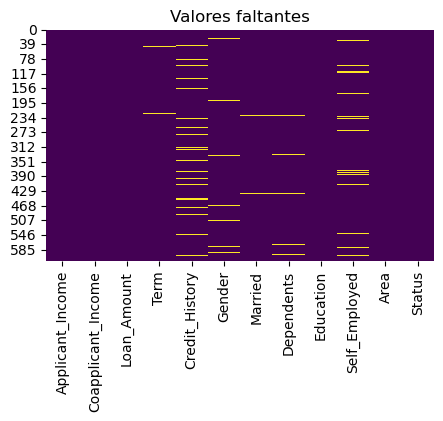

In [16]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
plt.title('Valores faltantes')

### Validación del dataset

In [23]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2,
    stratify = y,
    random_state = 42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('svm', svm.SVC())
    ])

params = {
    'svm__kernel' : ['linear', 'rbf'],
    'svm__C' : [3, 5],
    'svm__gamma' : [0.003, 0.005]
}

medidas = {
    'balanced_accuracy' : 'balanced_accuracy',
    'f1' : 'f1',
    'matthews_corrcoef' : 'matthews_corrcoef'
}

grid = GridSearchCV(
    estimator = pipeline,
    param_grid = params,
    cv = 10,
    scoring = medidas,
    refit = 'balanced_accuracy',
    n_jobs = -1
)

### Entrenar modelo

In [24]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [3, 5], 'svm__gamma': [0.003, 0.005],
                         'svm__kernel': ['linear', 'rbf']},
             refit='balanced_accuracy',
             scoring={'balanced_accuracy': 'balanced_accuracy', 'f1': 'f1',
                      'matthews_corrcoef': 'matthews_corrcoef'})

In [25]:
modelo = grid.best_estimator_

### Predicciónes

In [26]:
y_pred = modelo.predict(X_test)

### Medidas desempeño

In [27]:
medidas_df = calcula_medidas_biclase(y_test, y_pred)
medidas_df

,Medida,Valor
0,Accuracy,0.853659
1,Error Rate,0.146341
2,Recall (Sensitivity),0.988235
3,Specificity,0.552632
4,Balanced Accuracy,0.770433
5,Precision,0.831683
6,F1 Score,0.903226
7,MCC,0.652108
